In [58]:
from binance.client import Client
from config import api_key, api_secret
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('dark_background')
import numpy as np
import talib as ta
#%matplotlib inline
client = Client(api_key= api_key, api_secret=api_secret)

In [59]:
#HISTORICO 
candles = client.get_klines(symbol='XLMUSDT', interval=Client.KLINE_INTERVAL_5MINUTE, limit = 1000)

In [60]:
len(candles)

1000

In [61]:

price_df = pd.DataFrame(candles, columns=['dateTime',
                                          'open',
                                          'high', 'low',
                                          'close', 'volume',
                                          'closeTime', 
                                          'quoteAssetVolume',
                                          'numberOfTrades', 
                                          'takerBuyBaseVol', 
                                          'takerBuyQuoteVol', 'ignore'])
price_df.dateTime = pd.to_datetime(price_df.dateTime, unit='ms')
price_df.set_index('dateTime')
price_df.closeTime = pd.to_datetime(price_df.closeTime, unit='ms')
price_df.close = pd.to_numeric(price_df.close)
#price_df.set_index('closeTime', inplace=True)
#closeprice = price_df['close'].to_numpy()

price_df['ma50'] = price_df.close.ewm(span=50).mean()

price_df['ma21'] = price_df.close.ewm(span=21).mean()

price_df.ma50 = pd.to_numeric(price_df.ma50)

price_df.ma21 = pd.to_numeric(price_df.ma21)

price_df.ma50

price_df['RSI'] = ta.RSI(price_df['close'], timeperiod = 14)



0      0.094400
1      0.094349
2      0.094367
3      0.094296
4      0.094254
         ...   
995    0.097006
996    0.097029
997    0.097051
998    0.097073
999    0.097097
Name: ma50, Length: 1000, dtype: float64

In [35]:
#RSI

rsi_period = 14

chg = price_df['close'].diff(1)

gain = chg.mask(chg<0,0)
price_df['gain'] = gain


loss = chg.mask(chg>0,0)
price_df['loss'] = loss

avg_gain = gain.ewm(com = rsi_period-1,min_periods=rsi_period).mean()
avg_loss = loss.ewm(com = rsi_period-1,min_periods=rsi_period).mean()

price_df['avg_gain'] = avg_gain
price_df['avg_loss'] = avg_loss

rs = abs(avg_gain/avg_loss)
rsi = 100 - (100 /(1 + rs) )
rsi



0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
995    51.972578
996    60.231728
997    60.231728
998    60.231728
999    64.088337
Name: close, Length: 1000, dtype: float64

In [62]:
#new RSI



In [63]:
#signal 
signal = price_df['RSI']>70 and price_df['RSI'].shift(1) < 70

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

/tmp/ipykernel_3692/276521043.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax[0].text(price_df['closeTime'].tail(1), float(price_df['close'].mean())*0.995, f"Last:\n{int(price_df['close'].tail(1))}", ha="center", va="center", size=15, bbox=dict(boxstyle="round,pad=0.3", fc="blue", ec="w", lw=2))


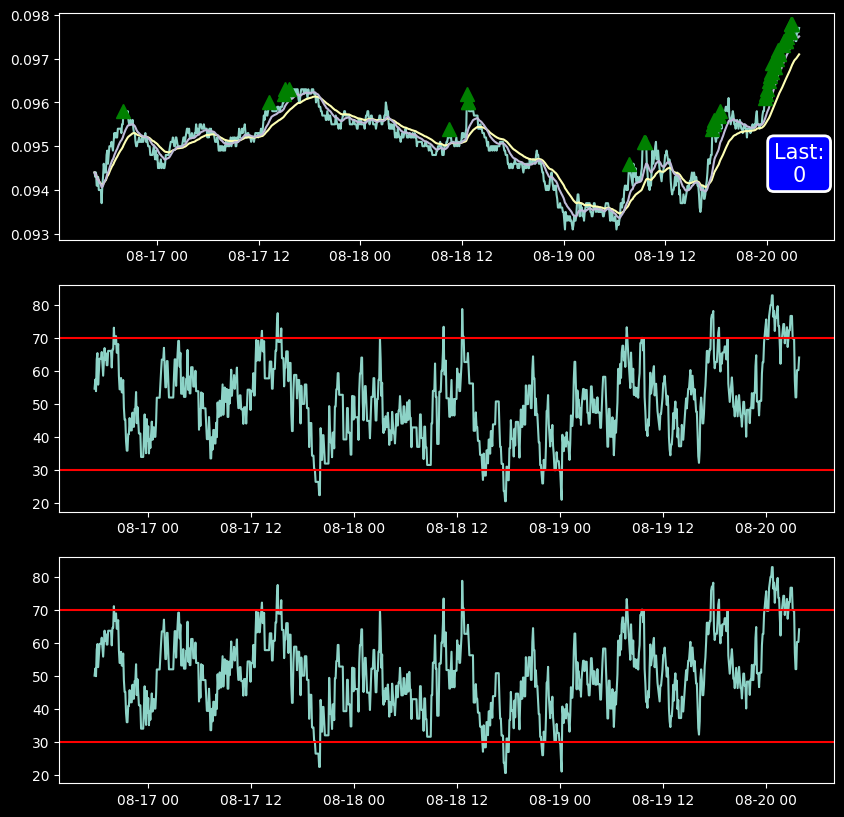

In [49]:
fig, ax = plt.subplots(3, figsize = (10,10))
ax[0].plot(price_df.closeTime,price_df.close)
ax[0].plot(price_df.closeTime,price_df.ma50)
ax[0].plot(price_df.closeTime,price_df.ma21)
ax[1].plot(price_df.closeTime,rsi)
ax[2].plot(price_df.closeTime,price_df.RSI)
ax[1].axhline(y= 30, color = 'r')
ax[1].axhline(y= 70, color = 'r')
ax[2].axhline(y= 30, color = 'r')
ax[2].axhline(y= 70, color = 'r')
ax[0].text(price_df['closeTime'].tail(1), float(price_df['close'].mean())*0.995, f"Last:\n{int(price_df['close'].tail(1))}", ha="center", va="center", size=15, bbox=dict(boxstyle="round,pad=0.3", fc="blue", ec="w", lw=2))   

#plot the signals over the price 

ax[0].plot(price_df['closeTime'][price_df['signal'] == 1], price_df['close'][price_df['signal'] == 1], '^', markersize=10, color='g') 

In [27]:
(price_df['closeTime'].tail(1))


999   2024-08-20 03:39:59.999
Name: closeTime, dtype: datetime64[ns]

In [87]:
for i in rsi.tail(100):
    if (i < 35) :
        print("Compra")
        print('precio:{}')
        print(i)



Compra
precio:{}
33.091017903117546
Compra
precio:{}
31.965430023553708
Compra
precio:{}
29.346025628368096
Compra
precio:{}
33.8016689486296
Compra
precio:{}
33.18233684740174
Compra
precio:{}
31.443531241572757
Compra
precio:{}
32.12108369804761
Compra
precio:{}
29.351125731779092
Compra
precio:{}
28.45943840818711
Compra
precio:{}
30.060542170787357
Compra
precio:{}
33.72021079946707
Compra
precio:{}
32.977857385302116
Compra
precio:{}
31.84273361479768


In [88]:
price_df['close'].mean()

23014.745699999992